# GDP ANALYSIS: VARIABLE COTRIBUTION AND ACCURANCY CHECKING
Using data(1980-2021)

In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [169]:
#Import cleaned and scaling(min,max) data

In [170]:
df=pd.read_csv("cleanned_data11.csv")
df.head(10)
# df=df.drop(labels=[0,1,2,3,4],axis=0)
df.tail(3)


,Unnamed: 0,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry,Time
40,40,0.420048,0.007534,0.372521,0.877828,0.992466,0.894329,0.254154,0.132900,0.452982,0.602941,0.743437,0.929469,2020
41,41,0.433174,0.076527,0.866856,0.837104,0.923473,0.859002,0.329846,0.143012,0.396789,0.602941,0.631935,0.958101,2021
42,42,0.565632,0.081285,0.889518,0.755656,0.918715,0.794236,0.566154,0.176598,0.321101,0.602941,0.287821,1.000000,2022


In [171]:
list(df.columns)
df=df.drop('Unnamed: 0',axis='columns')
df

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry,Time
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313,1980
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665,1981
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726,1982
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687,1983
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793,1984
5,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.269608,0.022463,0.050279,1985
6,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009804,0.023004,0.054469,1986
7,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.602941,0.070501,0.000000,1987
8,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.602941,0.090528,0.023743,1988
9,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.013268,1989


In [172]:
#correlation matrix



In [173]:
cor=df.corr()
cor

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry,Time
Exports,1.000000,-0.656600,0.622348,0.551832,0.656600,0.866409,0.925976,-0.157967,0.901113,0.516602,0.631762,0.506289,0.790233
FCE,-0.656600,1.000000,-0.685654,-0.613177,-1.000000,-0.883394,-0.475156,0.162893,-0.543367,-0.405353,-0.714242,-0.798536,-0.902927
GDP,0.622348,-0.685654,1.000000,0.454190,0.685654,0.683719,0.530272,-0.156871,0.497556,0.366894,0.548621,0.613760,0.689809
G_F_C_E,0.551832,-0.613177,0.454190,1.000000,0.613177,0.556594,0.508379,-0.032324,0.415821,0.500743,0.700437,0.813245,0.773218
D_Savings,0.656600,-1.000000,0.685654,0.613177,1.000000,0.883394,0.475156,-0.162893,0.543367,0.405353,0.714242,0.798536,0.902927
G_Savings,0.866409,-0.883394,0.683719,0.556594,0.883394,1.000000,0.760877,-0.158734,0.867513,0.477104,0.759363,0.703212,0.901203
Imports,0.925976,-0.475156,0.530272,0.508379,0.475156,0.760877,1.000000,-0.042988,0.897937,0.442654,0.576913,0.432776,0.665578
Inflation,-0.157967,0.162893,-0.156871,-0.032324,-0.162893,-0.158734,-0.042988,1.000000,-0.117729,-0.078587,0.074271,-0.099275,-0.194604
Remittances,0.901113,-0.543367,0.497556,0.415821,0.543367,0.867513,0.897937,-0.117729,1.000000,0.452117,0.603193,0.421684,0.691105
U,0.516602,-0.405353,0.366894,0.500743,0.405353,0.477104,0.442654,-0.078587,0.452117,1.000000,0.441474,0.373427,0.466097


<Axes: >

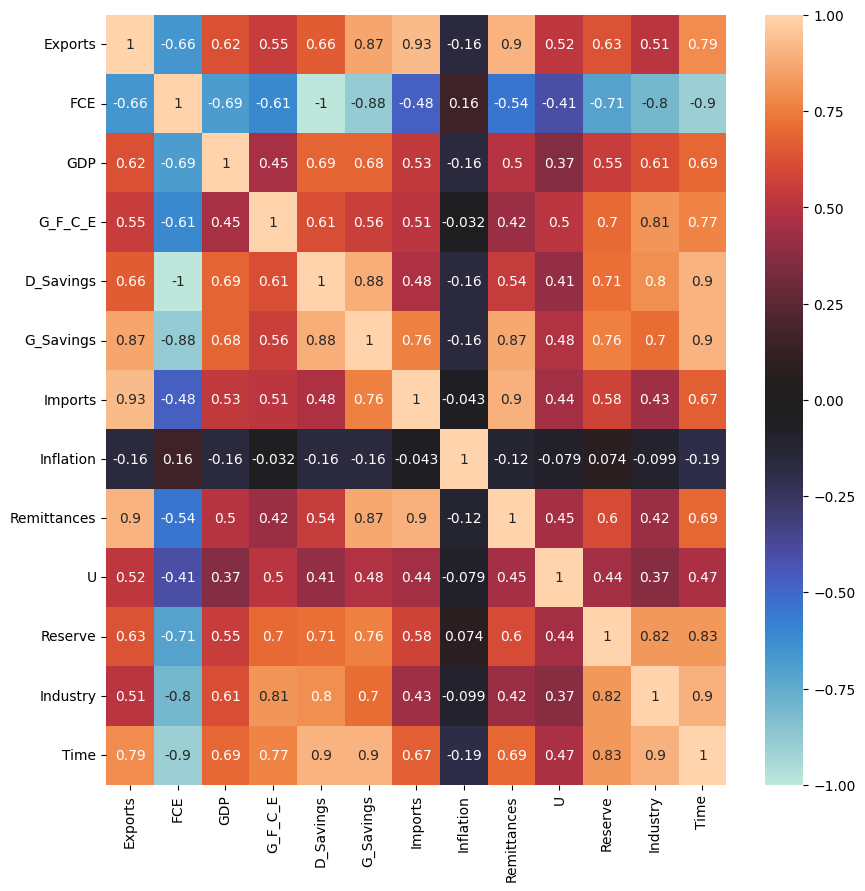

In [174]:
#Heatmap
plt.figure(figsize=(10,10))
           
                
annot=True
hemap=sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=annot)
hemap

mask_ut=np.triu(np.ones(cor.shape))
mask_ut

In [175]:
mask = np.triu(np.ones_like(df.corr()))
 

<function matplotlib.pyplot.show(close=None, block=None)>

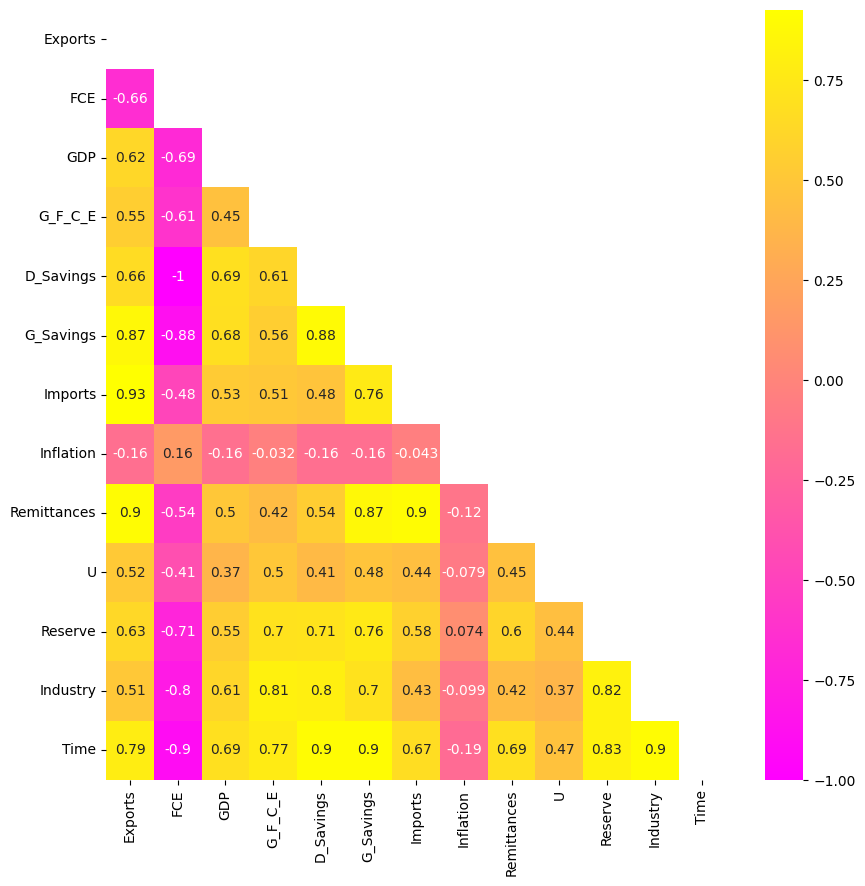

In [176]:
#upper trangular correlation matrix
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), mask=mask,cmap="spring",annot=True)
plt.show
# plt.savefig("upper_trangular_matrix.png")

In [177]:
mask = np.tril(np.ones_like(df.corr()))

<function matplotlib.pyplot.show(close=None, block=None)>

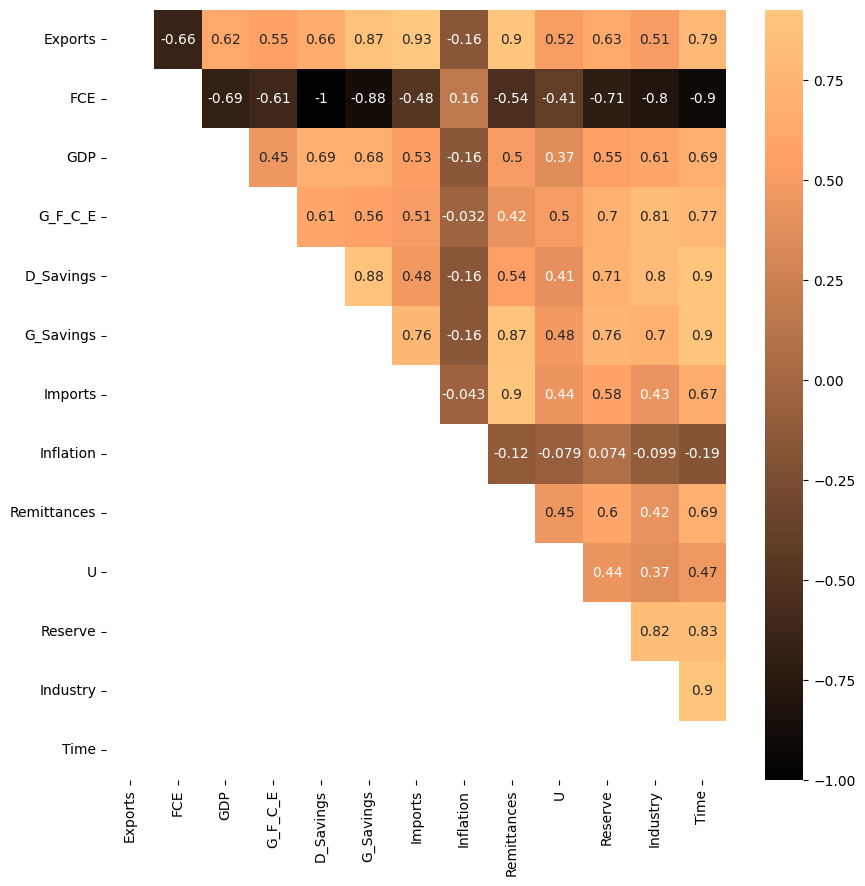

In [178]:
#Lower trangular correlation matrix.
# mask1=
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), mask=mask,cmap="copper",annot=True)
plt.show

# Multiple linear regression 

In [179]:
x=df.drop("GDP",axis=1)
x1=df.Time

y=df.GDP
x.shape,x1.shape,y.shape

((43, 12), (43,), (43,))

# Scatter plot

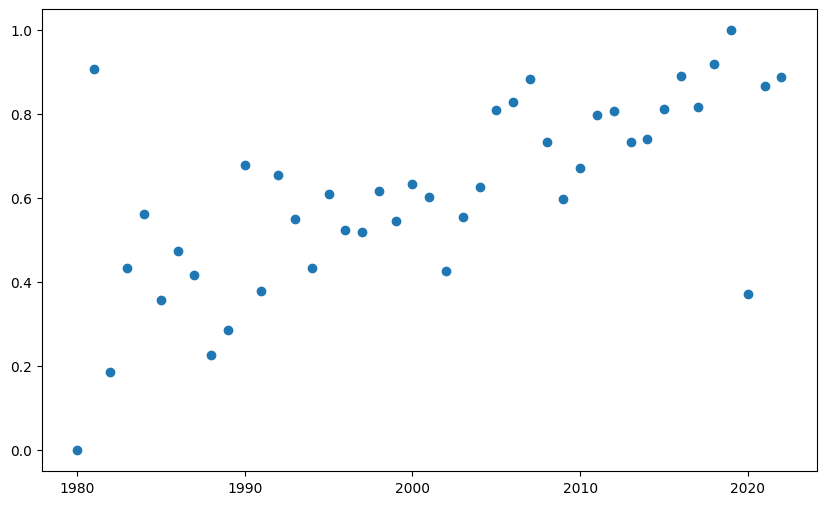

In [180]:
# mymodel = np.poly1d(np.polyfit(x1, y, 3))

# myline = np.linspace(0,10,52)
plt.scatter(x1,y)
# plt.plot(myline, mymodel(myline))
plt.show()

In [181]:
print(y)

0     0.000000
1     0.907932
2     0.185552
3     0.433428
4     0.563739
5     0.356941
6     0.474504
7     0.417847
8     0.226629
9     0.286119
10    0.679887
11    0.378187
12    0.654391
13    0.550992
14    0.434844
15    0.609065
16    0.524079
17    0.519830
18    0.617564
19    0.545326
20    0.633144
21    0.603399
22    0.426346
23    0.555241
24    0.626062
25    0.810198
26    0.828612
27    0.883853
28    0.735127
29    0.599150
30    0.672805
31    0.798867
32    0.807365
33    0.735127
34    0.742210
35    0.811615
36    0.890935
37    0.817280
38    0.920680
39    1.000000
40    0.372521
41    0.866856
42    0.889518
Name: GDP, dtype: float64


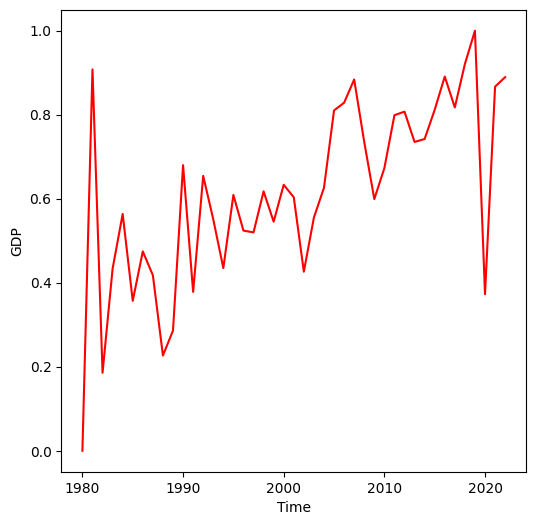

In [182]:
plt.figure(figsize=(6,6))
# plt.title("GDP of Bangladesh")
plt.xlabel("Time")
plt.ylabel("GDP")
plt.plot(df["Time"],df["GDP"],color="red")

In [183]:
df.shape


(43, 13)

In [184]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2)

# xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2)



In [185]:
# from sklearn.model_selection import TimeSeriesSplit
# xtrain,xtest,ytrain,ytest=model_selection.TimeSeriesSplit(n_splits=5, max_train_size=30, test_size=8, gap=1)

In [186]:
# dftrain=df[:30]
# dftrain.shape
X = df.drop("GDP",axis=1)
y = df.GDP

In [187]:
# dftest=df[30:]
# dftest.shape
X.shape,y.shape

((43, 12), (43,))

In [188]:
xtrain,xtest = X[:30],X[30:]
ytrain,ytest = y[:30],y[30:]
# xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2,random_state=None)

In [189]:
# xtrain = dftrain.drop(['GDP'],axis=1)
# xtest =dftest.drop(['GDP'],axis=1)
# ytrain = dftrain.GDP
# ytest = dftest.GDP

In [190]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((30, 12), (13, 12), (30,), (13,))

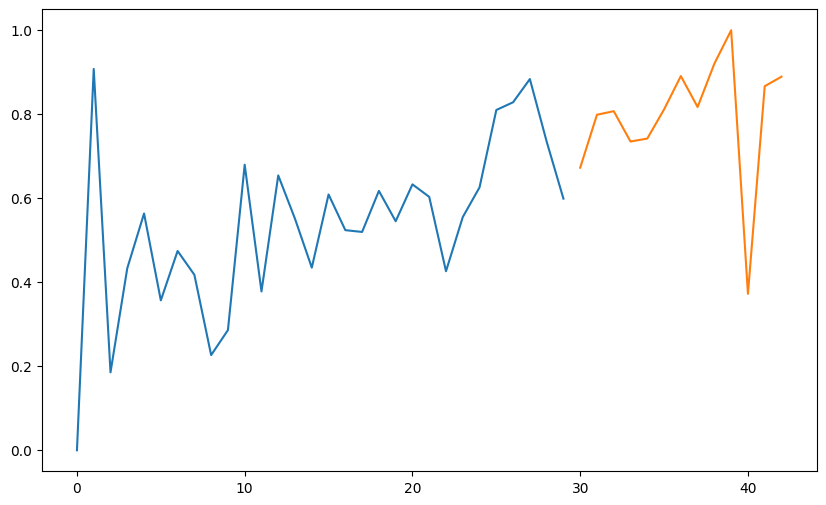

In [191]:
#---------------plot the train test data--------------------------
plt.plot(ytrain)
plt.plot(ytest)

In [192]:

# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2,random_state=17)

# Multiple linear regression

In [193]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

18.220612431988762
[ 0.62043735  0.3129435  -0.13791473 -0.3129435   1.63623744  0.12396406
 -0.0319419  -0.99683581  0.05142901 -0.12497671  0.52308454 -0.00931544]


In [194]:
xtrain.shape,xtest.shape

((30, 12), (13, 12))

In [195]:
ytrain.shape,ytest.shape

((30,), (13,))

In [196]:
lm.score(xtest,ytest)

0.3807665996917772

In [197]:
from sklearn.metrics import explained_variance_score



In [198]:
y_predict=lm.predict(xtest)

In [199]:
y_predict[:4]

array([0.6585432 , 0.8238493 , 0.79871667, 0.87274235])

In [200]:
print(explained_variance_score(ytest,y_predict))

0.3818670381463677


# Ordinary least square Regression

In [201]:
x=df.drop("GDP",axis=1)
y=df.GDP
import statsmodels.formula.api as smf

lm=smf.ols(formula='y~x',data=df).fit()  #ordinary least square method
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     4.362
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           0.000578
Time:                        20:38:12   Log-Likelihood:                 24.019
No. Observations:                  43   AIC:                            -24.04
Df Residuals:                      31   BIC:                            -2.904
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1471     23.656      0.513      0.611     -36.099      60.394
x[0]           0.6204      0.480      1.294      0.205      -0.358       1.598
x[1]           6.3865     11.262      0.567      0.575     -16.582      29.355
x[2]          -0.1379      0.289     -0.477      0.637      -0.728       0.452
x[3]           5.7606     12.433      0.463      0.646     -19.596      31.118
x[4]           1.6362      2.637      0.620      0.540      -3.743       7.015
x[5]           0.1240      0.354      0.351      0.728      -0.597       0.845
x[6]          -0.0319      0.166     -0.192      0.849      -0.371       0.307
x[7]          -0.9968      1.278     -0.780      0.441      -3.603       1.610
x[8]           0.0514      0.174      0.296      0.769      -0.303       0.405
x[9]          -0.1250      0.203     -0.616      0.542      -0.538       0.288
x[10]          0.5231      0.564      0.928      0.361      -0.627       1.673
x[11]         -0.0093      0.018     -0.530      0.600      -0.045       0.027
==============================================================================
Omnibus:                        2.992   Durbin-Watson:                   2.562
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.165
Skew:                           0.171   Prob(JB):                        0.339
Kurtosis:                       4.045   Cond. No.                     1.74e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.71e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [202]:
lm=smf.ols(formula="GDP~Industry+Reserve",data=df).fit()
lm.rsquared

0.38279993696662307

# Ridge regression model

In [203]:
from sklearn.linear_model import Ridge

In [204]:
#Ridge Regression Model
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(xtrain,ytrain)
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, ridgeReg.predict(xtrain)))))

print("Mean squared error for test data:{}".format(sqrt(mean_squared_error(ytest, ridgeReg.predict(xtest)))))

print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(xtest, ytest)))

Mean squared error for train data:0.16273036572750965
Mean squared error for test data:0.14905015576342778
R2 Value/Coefficient of Determination: -0.02469823962991513


# Lasso regression model


In [205]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold



In [206]:
xtrain.sample(5),ytrain.sample(5)

(     Exports       FCE   G_F_C_E  D_Savings  G_Savings   Imports  Inflation  \
 5   0.118138  0.505948  0.000000   0.494052   0.408739  0.070154   0.662333   
 22  0.537589  0.254956  0.447964   0.745044   0.694763  0.299077   0.134706   
 18  0.498807  0.342189  0.497738   0.657811   0.542299  0.272000   0.165403   
 6   0.106205  0.478192  0.076923   0.521808   0.447784  0.008615   0.292163   
 27  0.811456  0.258525  0.601810   0.741475   0.867369  0.692308   0.227880   
 
     Remittances         U   Reserve  Industry  Time  
 5      0.044725  0.269608  0.022463  0.050279  1985  
 22     0.384174  0.602941  0.088363  0.226257  2002  
 18     0.153670  0.602941  0.117591  0.213687  1998  
 6      0.089450  0.009804  0.023004  0.054469  1986  
 27     0.730505  0.602941  0.280514  0.342179  2007  ,
 13    0.550992
 27    0.883853
 8     0.226629
 18    0.617564
 19    0.545326
 Name: GDP, dtype: float64)

In [207]:
print('##-----------LASSO REGRESSION----------------#############')
##Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. 
## absulate sum of square

lasso = Lasso(alpha = 10)
lasso.fit(xtrain,ytrain)
train_score_ls =lasso.score(xtrain,ytrain)
test_score_ls =lasso.score(xtest,ytest)
print(train_score_ls)
print(test_score_ls)

print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, lasso.predict(xtrain)))))

print("Mean squared error for test data:{}".format(sqrt(mean_squared_error(ytest, lasso.predict(xtest)))))

print('R2 Value/Coefficient of Determination: {}'.format(lasso.score(xtest, ytest)))

##-----------LASSO REGRESSION----------------#############
0.0
-3.0866970406590744
Mean squared error for train data:0.2008465730812389
Mean squared error for test data:0.29766012570730543
R2 Value/Coefficient of Determination: -3.0866970406590744


In [208]:
# print(sqrt(mean_squared_error(ytrain, Lasso.predict(xtrain))))
# print(sqrt(mean_squared_error(ytest, Lasso.predict(xtest))))
# print('R2 Value/Coefficient of Determination: {}'.format(Lasso.score(xtest, ytest)))

# Support vector regression

In [209]:
from sklearn.svm import SVR
model_svr=SVR(kernel="rbf")
model_svr.fit(xtrain,ytrain)


SVR()

In [210]:
model_svr.score(xtest,ytest)

-3.2105446031516998

In [211]:
y_pred=model_svr.predict(xtest)
print(y_pred[:4])
r2_score(ytest,y_pred)

[0.5301667  0.53021399 0.53026099 0.53030768]


-3.2105446031516998

In [212]:
# from sklearn.svm import SVC
# model_svr=SVC()
# model_svr.fit(xtrain,ytrain)
print(type(xtrain))

<class 'pandas.core.frame.DataFrame'>


# Random Forest Regressor

In [213]:

# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=0)

In [214]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)


(30, 12)
(13, 12)
(30,)


In [215]:
from sklearn.ensemble import RandomForestRegressor
RFreg=RandomForestRegressor(n_estimators=5,max_depth=10,min_samples_split=4)
RFreg.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=5)

In [216]:
output=pred_RFreg=RFreg.predict(xtest)
output
print(pred_RFreg[:4]) #prediction next four gdp

[0.61305949 0.61305949 0.59628895 0.66220963]


In [217]:
output[1]

0.6130594900849857

In [218]:
ytest[:1]

30    0.672805
Name: GDP, dtype: float64

In [219]:
RFreg.score(xtest,ytest)

-0.11189316172672603

R_square

In [220]:
from sklearn import metrics
metrics.r2_score(ytest,pred_RFreg)

-0.11189316172672603

# GradientBoostRegressor

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

In [222]:
#Instantiate Gradient Boosting Regressor
gbc = GradientBoostingRegressor(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=42,
                                 max_features=5 )

In [223]:
#fit
gbc.fit(xtrain, ytrain)
 
# Predict on test set
pred_y = gbc.predict(xtest)
print("Prediction of GDP",pred_y[:4])
 

Prediction of GDP [0.65563387 0.67006653 0.64519126 0.65443441]


In [224]:
# test set RMSE
test_rmse = mean_squared_error(ytest, pred_y) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))


Root mean Square error: 0.16


In [225]:
metrics.r2_score(ytest,pred_y)

-0.16276902372516444

# AdaboostRegressor

In [226]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
adr.fit(xtrain, ytrain)
y_pred = adr.predict(xtest)
print(y_pred[:4])
print("AdaBoost - R2: ",
      r2_score(ytest, y_pred))

[0.63896758 0.67053824 0.63695794 0.63896758]
AdaBoost - R2:  -0.3388732327472701


# TIME SERIES ANALYSIS

In [227]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model.ARIMA 
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import warnings
warnings.filterwarnings('ignore')

In [228]:
###Time series analaysis between time and gdp

In [229]:

df1=df.reindex(columns=['Time','GDP'])
df1.head(10)
print(df1.shape)

(43, 2)


In [230]:
# result = seasonal_decompose(df1['GDP'], model ='multiplicative')
# result.plot()

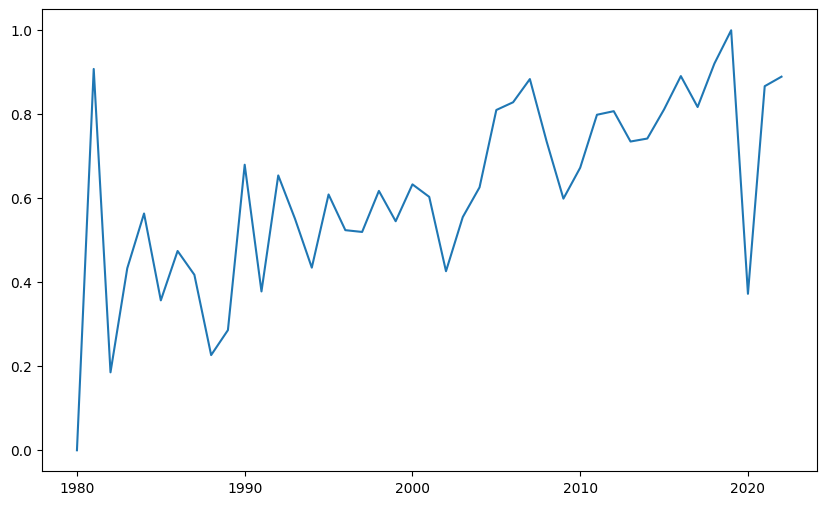

In [231]:
plt.plot(df1['Time'],df1['GDP'])
# plt.title('GDP of Bangladesh')

plt.show()


In [232]:
# df1['Time']=df1['Time'].apply(lambda x:dt(int(x[:4]),int(x[5:]),15))
# df1=df1.set_index('Time')

In [233]:
print(df1.head())

   Time       GDP
0  1980  0.000000
1  1981  0.907932
2  1982  0.185552
3  1983  0.433428
4  1984  0.563739


In [234]:
ts=df1['GDP']

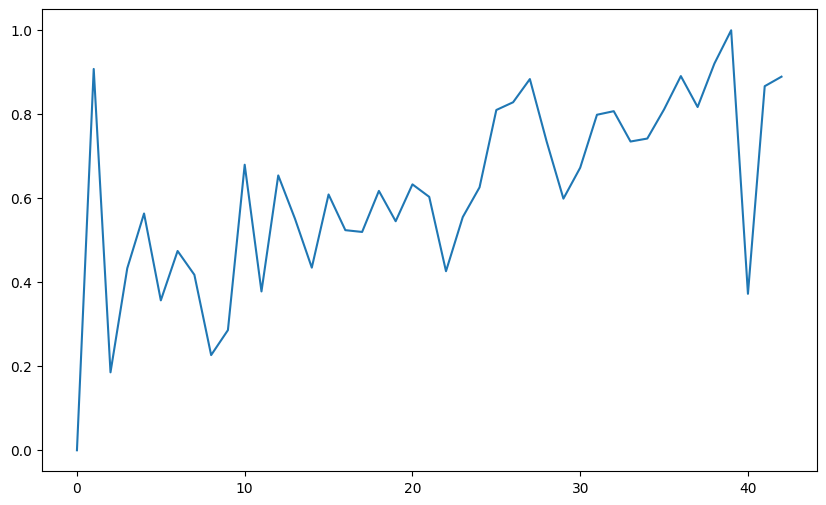

In [235]:
plt.plot(ts)

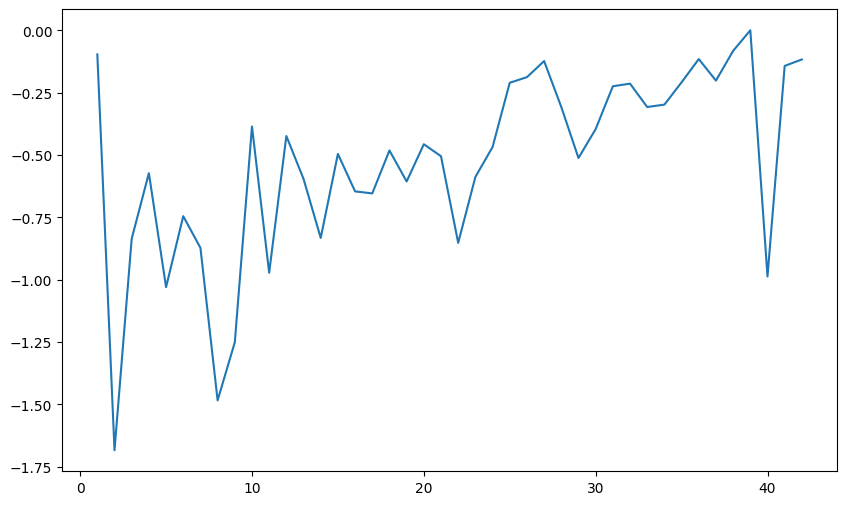

In [236]:
ts_log=np.log(ts)
(ts_log)
plt.plot(ts_log)

In [237]:
df1.head(10)
df1.min()

Time    1980.0
GDP        0.0
dtype: float64

## Stationary check

In [238]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolestd=timeseries.rolling(window=52,center=False).std()
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolestd,color='green',label='Rolling std')
    plt.legend(loc='best')
    # plt.title('Rolling mean & rolling std')
    plt.show(block=False)
    print('Result of Dickey fuller test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test statistic','P-value',"#lags Used",'Number of obs. used'])
    for key,value in dftest[4].items():
        dfoutput['critical value(%s)'%key]=value
        print(dfoutput)


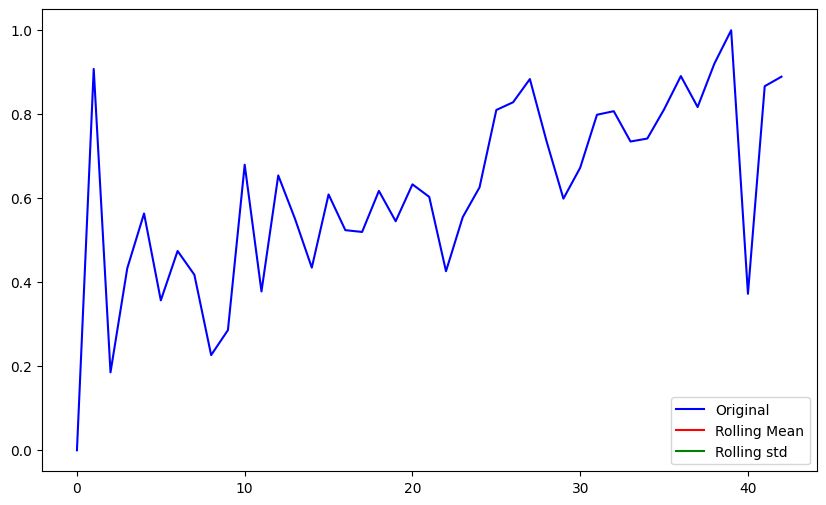

Result of Dickey fuller test:
Test statistic         -0.599285
P-value                 0.871144
#lags Used              5.000000
Number of obs. used    37.000000
critical value(1%)     -3.620918
dtype: float64
Test statistic         -0.599285
P-value                 0.871144
#lags Used              5.000000
Number of obs. used    37.000000
critical value(1%)     -3.620918
critical value(5%)     -2.943539
dtype: float64
Test statistic         -0.599285
P-value                 0.871144
#lags Used              5.000000
Number of obs. used    37.000000
critical value(1%)     -3.620918
critical value(5%)     -2.943539
critical value(10%)    -2.610400
dtype: float64


In [239]:
test_stationarity(df1['GDP'])

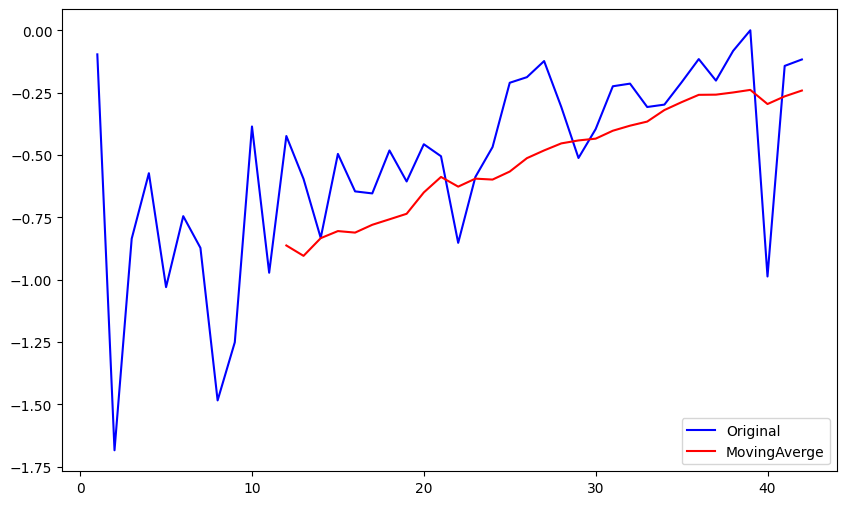

In [240]:
movingAverage=ts_log.rolling(window=12).mean()
movingstd=ts_log.rolling(window=12).std()
plt.plot(ts_log,color='blue',label='Original')
plt.plot(movingAverage,color='red',label='MovingAverge')
plt.legend(loc='best')
plt.show()

In [241]:
#difference
ts_log_mv_diff=ts_log-movingAverage
print(ts_log_mv_diff.head(12))
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: GDP, dtype: float64


12    0.438995
13    0.308630
14    0.000928
15    0.309515
16    0.165312
17    0.125843
18    0.276164
19    0.129576
20    0.193276
21    0.082976
Name: GDP, dtype: float64

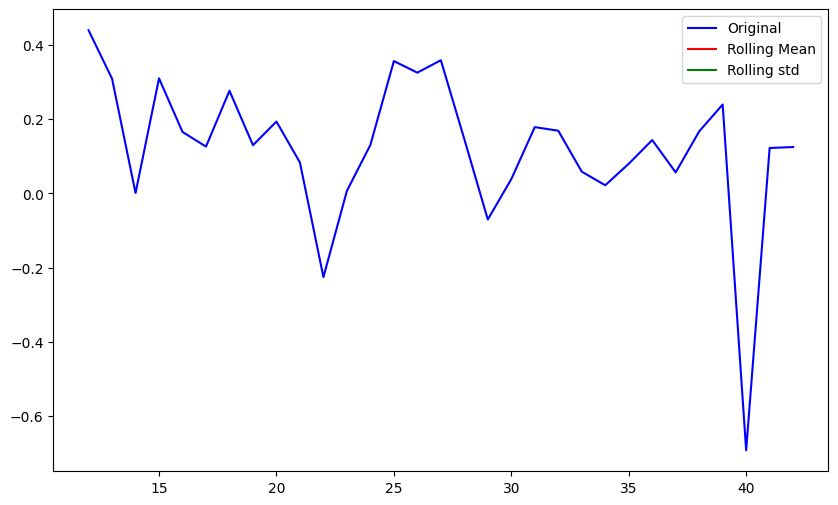

Result of Dickey fuller test:
Test statistic         -5.107517
P-value                 0.000014
#lags Used              0.000000
Number of obs. used    30.000000
critical value(1%)     -3.669920
dtype: float64
Test statistic         -5.107517
P-value                 0.000014
#lags Used              0.000000
Number of obs. used    30.000000
critical value(1%)     -3.669920
critical value(5%)     -2.964071
dtype: float64
Test statistic         -5.107517
P-value                 0.000014
#lags Used              0.000000
Number of obs. used    30.000000
critical value(1%)     -3.669920
critical value(5%)     -2.964071
critical value(10%)    -2.621171
dtype: float64


In [242]:
test_stationarity(ts_log_mv_diff)

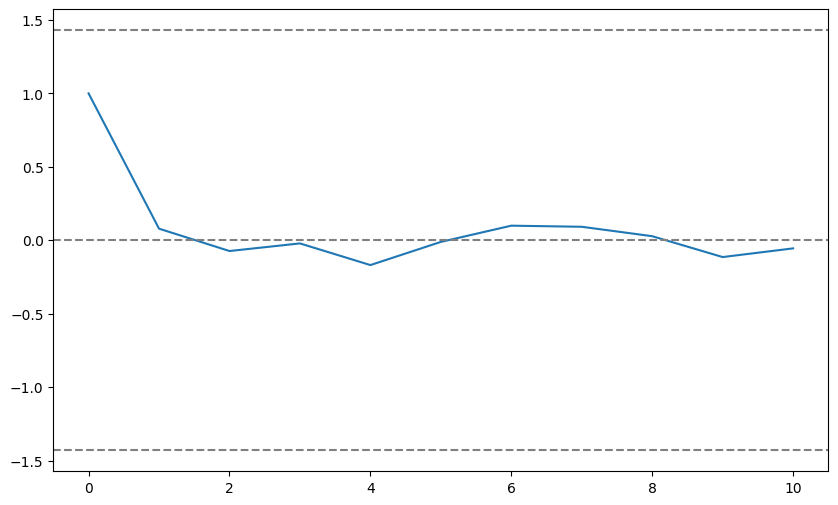

In [243]:
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
# plt.title('autocorreltion function')
plt.show()

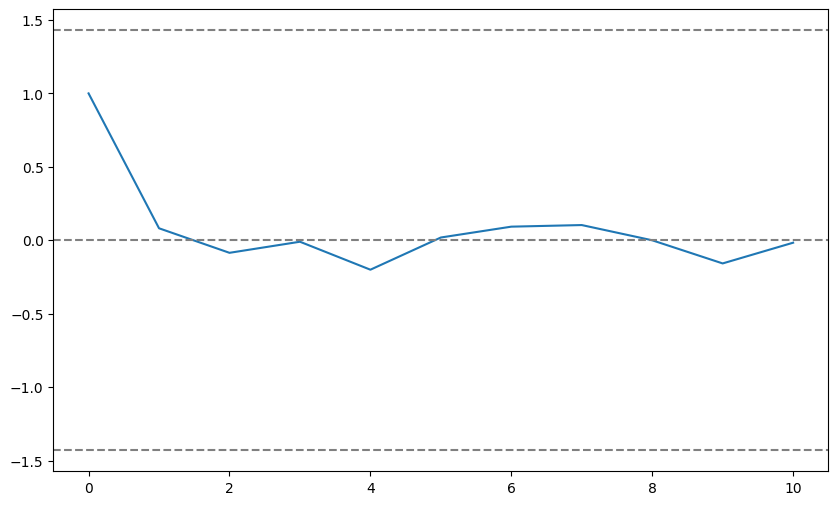

In [244]:
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
# plt.title('Partial autocorreltion function')
plt.show()

In [245]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['GDP'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-5.831, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-8.648, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-7.819, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5.731, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6.252, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-8.018, Time=0.94 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-8.000, Time=1.31 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-7.020, Time=0.34 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=-6.018, Time=1.33 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-7.256, Time=0.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-7.510, Time=0.57 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-9.903, Time=0.41 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-6.582, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   43
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                   8.951
Date:                             Sat, 23 Dec 2023   AIC                             -9.903
Time:                                     20:38:31   BIC                             -4.167
Sample:                                          0   HQIC                            -8.033
                                              - 43                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2362      0.050      4.765      0.000       0.139       0.333
ma.L1         -0.4919      0.220     -2.237      0.025      -0.923      -0.061
ar.S.L12      -0.5411      0.297     -1.820      0.069      -1.124       0.042
sigma2         0.0285      0.011      2.586      0.010       0.007       0.050
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.63   Prob(JB):                         0.79
Heteroskedasticity (H):               0.86   Skew:                            -0.22
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [246]:
model = ARIMA(ts_log, order=(1,1,1)) 
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%(((results_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2).mean()))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log 
predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head() 

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(((predictions_ARIMA-ts)**2)/(ts)).mean()) 

## Train Test Split

In [ ]:
plt.bar(range(numof_lags),pacf_vals2[:numof_lags])

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
len(xtrain)

In [ ]:
len(xtest)

In [ ]:
xtrain

In [ ]:
df.head()

In [ ]:
plt.plot(ytest)

In [ ]:
df.shape

In [ ]:
47*.9

In [ ]:
dftrain = df[:38]

In [ ]:
dftrain.shape

In [ ]:
dftest=df[38:]

In [ ]:
dftest.shape

In [ ]:
dftrain.columns

In [ ]:
xtrain = dftrain.drop(['GDP'],axis=1)
xtest =dftest.drop(['GDP'],axis=1)
ytrain = dftrain.GDP
ytest = dftest.GDP

In [ ]:
plt.plot(ytrain)
plt.plot(ytest)

In [ ]:
y=df.GDP

In [ ]:
y.shape

In [ ]:
x=df.drop("GDP",axis=1)

In [ ]:
x.shape

In [ ]:
xtrain=df[:30]
ytrain=df[:30]

In [ ]:
xtrain.shape
ytrain.shape


In [ ]:
ytrain.shape

In [ ]:
xtest=df[30:]
ytest=df.GDP[30:]

In [ ]:
df.columns

In [ ]:
xtest.shape

In [ ]:
ytest.shape

In [ ]:
from sklearn.svm import SVR
model_svr=SVR(kernel="rbf")
model_svr.fit(xtrain,ytrain)
